In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join
import re
from datetime import datetime
%matplotlib inline

In [30]:
mypath = "./snapshots/"

In [31]:
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
df_files = pd.DataFrame({"filename" : onlyfiles})

currency_per_snapshots = []
num_crypto_per_snapshot= []
timestamps = []
is_swissborg_in = []

for idx, row in df_files.iterrows():
    data = pd.read_csv(join(mypath, row['filename']))
    if len(data[data['Symbol'] == 'CHSB']) > 0:
        is_swissborg_in.append(True)
    else:
        is_swissborg_in.append(False)
    date_time = re.findall("[0-9]{8}",row['filename'])[0]
    num_crypto_per_snapshot.append(len(data)) 
    timestamps.append(date_time)

df_files.index = pd.to_datetime(timestamps, format="%Y%m%d")
df_files['num_crypto'] = pd.to_numeric(num_crypto_per_snapshot)
df_files['is_swissborg_in'] = is_swissborg_in
df_files.sort_index(inplace=True)

In [32]:
swissborg_introduction = df_files[df_files['is_swissborg_in'] == True].head(1).index.values[0]

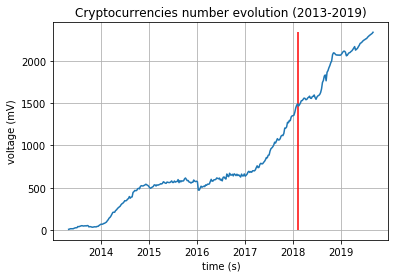

In [33]:
fig, ax = plt.subplots()
ax.plot(df_files.index, df_files['num_crypto'])

ax.set(xlabel='time (s)', ylabel='voltage (mV)',
       title='Cryptocurrencies number evolution (2013-2019)')
ax.grid()
ax.vlines(swissborg_introduction, ymin = 0, ymax = max(df_files['num_crypto']),color="red",label="Swissborg introduction")

fig.savefig("test.png")
plt.show()

In [45]:
snapshots_data = pd.read_csv("./list.csv")

In [46]:
snapshots_data.index = pd.to_datetime(snapshots_data['snapshots_date'])

In [47]:
snapshots_data.drop(labels=['Unnamed: 0','Unnamed: 0.1', 'snapshots_date'],axis=1, inplace=True)

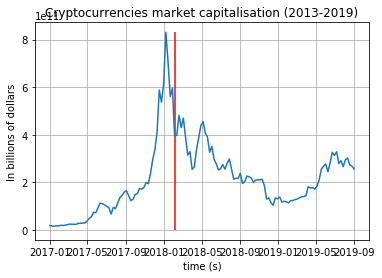

In [103]:
subperiod = snapshots_data[snapshots_data.index >= "2017-01-01"]

fig, ax = plt.subplots()
ax.plot(subperiod.index, subperiod['total_cap'])

ax.set(xlabel='time (s)', ylabel='In billions of dollars',
       title='Cryptocurrencies market capitalisation (2013-2019)')
ax.grid()
ax.vlines(swissborg_introduction, ymin = 0, ymax = max(subperiod['total_cap']),color="red",label="Swissborg introduction")

fig.savefig("test.png")
plt.show()

In [104]:
subperiod[subperiod['total_cap'] == max(subperiod['total_cap'])]

,snapshots_url,snapshots,total_cap
snapshots_date,,,
2018-01-07,https://coinmarketcap.com/historical/20180107/,20180107,8.305955e+11


In [105]:
BTC_subperiod = pd.read_html("https://coinmarketcap.com/currencies/bitcoin/historical-data/?start=20170101&end=20190905")[0]

In [106]:
BTC_subperiod.index = pd.to_datetime(BTC_subperiod['Date'])

In [107]:
subperiod = pd.concat([subperiod, BTC_subperiod[['Market Cap']]], axis=1).dropna()

In [108]:
subperiod.columns = ['snapshot_url','snapshots','total_market_cap', 'btc_market_cap']

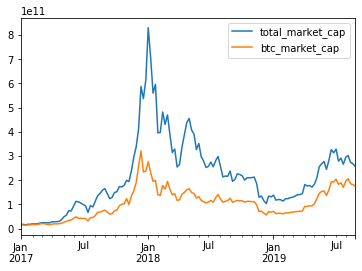

In [109]:
subperiod[['total_market_cap', 'btc_market_cap']].plot()

In [111]:
subperiod['total_market_cap_all_but_btc'] = subperiod['total_market_cap'] - subperiod['btc_market_cap']
subperiod

,snapshot_url,snapshots,total_market_cap,btc_market_cap,total_market_cap_all_but_btc
2017-01-01,https://coinmarketcap.com/historical/20170101/,20170101.0,1.826012e+10,16050407461,2.209716e+09
2017-01-08,https://coinmarketcap.com/historical/20170108/,20170108.0,1.704136e+10,14661966429,2.379396e+09
2017-01-15,https://coinmarketcap.com/historical/20170115/,20170115.0,1.555409e+10,13234840657,2.319246e+09
2017-01-22,https://coinmarketcap.com/historical/20170122/,20170122.0,1.740316e+10,14905439337,2.497718e+09
2017-01-29,https://coinmarketcap.com/historical/20170129/,20170129.0,1.738434e+10,14834377926,2.549963e+09
2017-02-05,https://coinmarketcap.com/historical/20170205/,20170205.0,1.933939e+10,16588240157,2.751149e+09
2017-02-12,https://coinmarketcap.com/historical/20170212/,20170212.0,1.884240e+10,16146290349,2.696108e+09
2017-02-19,https://coinmarketcap.com/historical/20170219/,20170219.0,1.979081e+10,16946913346,2.843897e+09
2017-02-26,https://coinmarketcap.com/historical/20170226/,20170226.0,2.185988e+10,18860247630,2.999635e+09
2017-03-05,https://coinmarketcap.com/historical/20170305/,20170305.0,2.422018e+10,20526235270,3.693949e+09


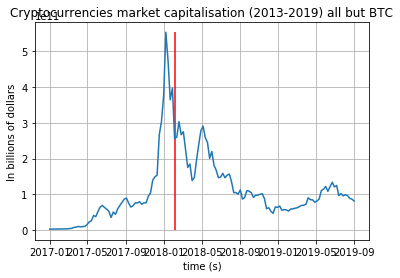

In [113]:
subperiod = subperiod[subperiod.index >= "2017-01-01"]

fig, ax = plt.subplots()
ax.plot(subperiod.index, subperiod['total_market_cap_all_but_btc'])

ax.set(xlabel='time (s)', ylabel='In billions of dollars',
       title='Cryptocurrencies market capitalisation (2013-2019) all but BTC')
ax.grid()
ax.vlines(swissborg_introduction, ymin = 0, ymax = max(subperiod['total_market_cap_all_but_btc']),color="red",label="Swissborg introduction")

fig.savefig("test.png")
plt.show()